# Wine Quality Prediction Modelling

In [19]:
## Importing Libraraies
import os
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
path='C:\Data Science Datasets'
os.chdir(path)

In [21]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
## Copying the Data
data = wine.copy()
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Analyzing the Data

In [23]:
data.shape

(1599, 12)

In [24]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1599
Number of Columns 12


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
data.isnull().sum()  ##Checking The null values in data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [27]:
data.describe()   ## Checking Overall Statistics

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Quality and Fixed Acidity

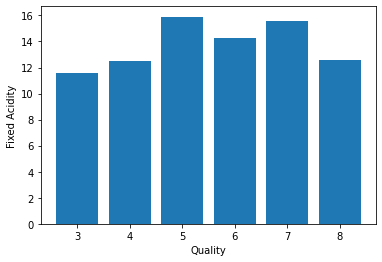

In [30]:
plt.bar(data['quality'],data['fixed acidity'])
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.show()

# Volatile Acidity and Quality

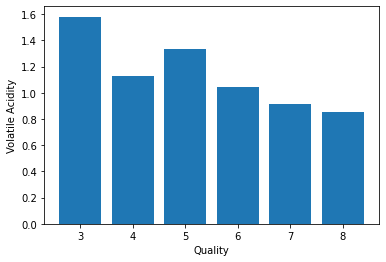

In [31]:
plt.bar(data['quality'],data['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()

# Residual Sugar and Quality

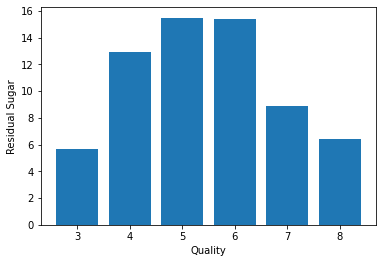

In [32]:
plt.bar(data['quality'],data['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')
plt.show()

# Chlorides and Quality

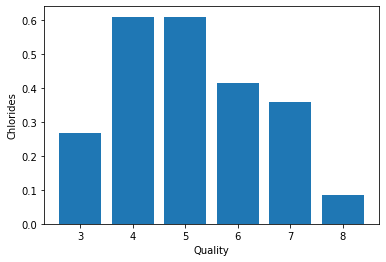

In [34]:
plt.bar(data['quality'],data['chlorides'])
plt.xlabel('Quality')
plt.ylabel('Chlorides')
plt.show()

# Total Sulphur Dioxide and Quality

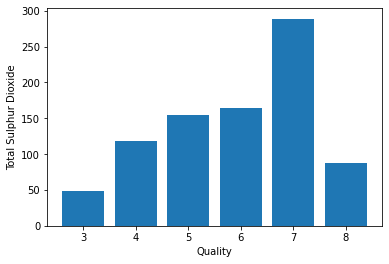

In [37]:
plt.bar(data['quality'],data['total sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('Total Sulphur Dioxide')
plt.show()

# Alcohol and Quality

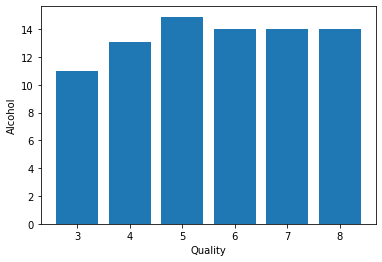

In [38]:
plt.bar(data['quality'],data['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

# Correlation Matrix

In [39]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot: >

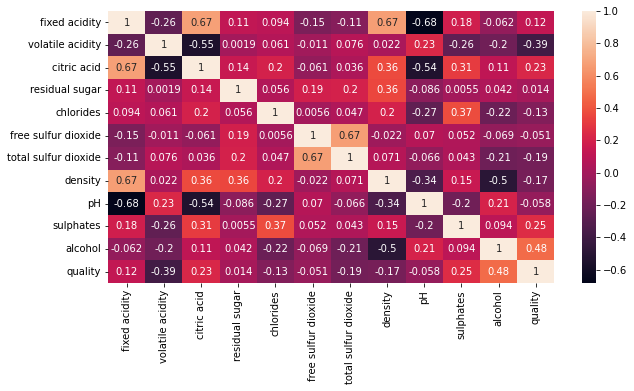

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot = True,)

# Binarization of Target variable

In [42]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [44]:
data['quality'] = [1 if x>=7 else 0 for x in data['quality']]

In [46]:
data['quality'].unique()

array([0, 1], dtype=int64)

# Not Handling Imbalanced Dataset

In [47]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot: xlabel='quality', ylabel='count'>

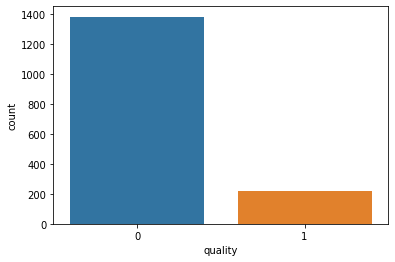

In [49]:
sns.countplot(x =data['quality'])

# Store the Data for model building

In [51]:
x = data.drop('quality',axis = 1)
y = data['quality']

# Split the Data Into Training and Testing set

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=45)

# Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Applying PCA

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=0.90)

In [62]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [65]:
pca.explained_variance_ratio_

array([0.27795174, 0.1813254 , 0.13609352, 0.11254965, 0.08570209,
       0.06028283, 0.0543919 ])

In [64]:
sum(pca.explained_variance_ratio_)

0.9082971508251012

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [69]:
log = LogisticRegression()
log.fit(x_train,y_train)
print("Model Training Started")

Model Training Started


In [70]:
## Model Prediction
y_pred1 = log.predict(x_test)
y_pred1

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [73]:
from sklearn.metrics import accuracy_score

In [89]:
ac = accuracy_score(y_test,y_pred1)*100
print("The Accuracy Score of our model is ",ac,"%")

The Accuracy Score of our model is  87.8125 %


In [75]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [88]:
ps = precision_score(y_test,y_pred1)*100
print("The Precision Score of our model",ps,"%")

The Precision Score of our model 47.82608695652174 %


In [87]:
rs = recall_score(y_test,y_pred1)*100
print("The recall score of our model ",rs,"%")

The recall score of our model  28.947368421052634 %


In [86]:
fs = f1_score(y_test,y_pred1)*100
print("The F1 score of our model is ",fs,"%")

The F1 score of our model is  36.065573770491795 %


# Handling Imbalancing Dataset

In [90]:
from imblearn.over_sampling import SMOTE

In [91]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [92]:
y_res.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

# Split the Data for training and testing

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.20,random_state=45)

In [98]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Logistic Regression

In [99]:
log1 = LogisticRegression()
log1.fit(x_train,y_train)
print("Model Training Started")

Model Training Started


In [102]:
## Model Prediction
y_pred2 = log1.predict(x_test)
y_pred2

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,

In [103]:
ac1 = accuracy_score(y_test,y_pred2)*100
print("The Accuracy Score of our model is ",ac1,"%")

The Accuracy Score of our model is  81.374321880651 %


In [104]:
ps1 = precision_score(y_test,y_pred2)*100
print("The Precision Score of our model",ps1,"%")

The Precision Score of our model 83.73702422145328 %


In [105]:
rs1 = recall_score(y_test,y_pred2)*100
print("The recall score of our model ",rs1,"%")

The recall score of our model  81.20805369127517 %


In [106]:
fs1= f1_score(y_test,y_pred2)*100
print("The F1 score of our model is ",fs1,"%")

The F1 score of our model is  82.45315161839865 %


# K Neighbors Classifier

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
print("Model Trainging Started")

Model Trainging Started


In [122]:
## Model Prediction
y_pred3 = knn.predict(x_test)
y_pred3

C:\Users\suchit ambolkar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [123]:
ac2= accuracy_score(y_test,y_pred3)*100
print("The Accuracy Score of our model is ",ac2,"%")

The Accuracy Score of our model is  90.05424954792043 %


In [124]:
ps2 = precision_score(y_test,y_pred3)*100
print("The Precision Score of our model",ps2,"%")

The Precision Score of our model 85.63049853372434 %


In [125]:
rs2 = recall_score(y_test,y_pred3)*100
print("The recall score of our model ",rs2,"%")

The recall score of our model  97.98657718120806 %


In [126]:
fs2= f1_score(y_test,y_pred3)*100
print("The F1 score of our model is ",fs2,"%")

The F1 score of our model is  91.39280125195619 %


# Decision Tree Classifier

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Model Training Started")

Model Training Started


In [132]:
## Model Prediction
y_pred4 = dt.predict(x_test)
y_pred4

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [133]:
ac3= accuracy_score(y_test,y_pred4)*100
print("The Accuracy Score of our model is ",ac3,"%")

The Accuracy Score of our model is  89.5117540687161 %


In [134]:
ps3= precision_score(y_test,y_pred4)*100
print("The Precision Score of our model",ps3,"%")

The Precision Score of our model 93.16546762589928 %


In [135]:
rs3 = recall_score(y_test,y_pred4)*100
print("The recall score of our model ",rs3,"%")

The recall score of our model  86.91275167785236 %


In [136]:
fs3= f1_score(y_test,y_pred4)*100
print("The F1 score of our model is ",fs3,"%")

The F1 score of our model is  89.93055555555556 %


# Random Forest Classifier

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
print("Model Training Start")

Model Training Start


In [140]:
## Model Prediction
y_pred5 = rf.predict(x_test)
y_pred5

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [141]:
ac4= accuracy_score(y_test,y_pred5)*100
print("The Accuracy Score of our model is ",ac4,"%")

The Accuracy Score of our model is  92.40506329113924 %


In [142]:
ps4= precision_score(y_test,y_pred5)*100
print("The Precision Score of our model",ps4,"%")

The Precision Score of our model 92.3841059602649 %


In [143]:
rs4 = recall_score(y_test,y_pred5)*100
print("The recall score of our model ",rs4,"%")

The recall score of our model  93.6241610738255 %


In [144]:
fs4= f1_score(y_test,y_pred5)*100
print("The F1 score of our model is ",fs4,"%")

The F1 score of our model is  93.0 %


# Gradient Boosting Classifier

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

In [147]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
print("Model Training Starts")

Model Training Starts


In [148]:
## Model Prediction
y_pred6 = gbc.predict(x_test)
y_pred6

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [149]:
ac5= accuracy_score(y_test,y_pred6)*100
print("The Accuracy Score of our model is ",ac5,"%")

The Accuracy Score of our model is  89.33092224231464 %


In [150]:
ps5= precision_score(y_test,y_pred6)*100
print("The Precision Score of our model",ps5,"%")

The Precision Score of our model 88.42443729903538 %


In [151]:
rs5 = recall_score(y_test,y_pred6)*100
print("The recall score of our model ",rs5,"%")

The recall score of our model  92.28187919463086 %


In [152]:
fs5= f1_score(y_test,y_pred6)*100
print("The F1 score of our model is ",fs5,"%")

The F1 score of our model is  90.311986863711 %


In [155]:
final_data = pd.DataFrame({'Models':['LR','KNN','DT','RF','GBC'],
             'ACC':[accuracy_score(y_test,y_pred2)*100,
                   accuracy_score(y_test,y_pred3)*100,
                   accuracy_score(y_test,y_pred4)*100,
                   accuracy_score(y_test,y_pred5)*100,
                   accuracy_score(y_test,y_pred6)*100,
                   ]})

<AxesSubplot: xlabel='Models', ylabel='ACC'>

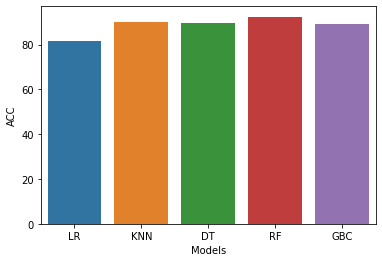

In [156]:
sns.barplot(x= final_data['Models'],y = final_data['ACC'])

In [159]:
print("Random Forest Classifier is the best model for our data prediction.")

Random Forest Classifier is the best model for our data prediction.


# Save The Model

In [160]:
x = data.drop('quality',axis = 1)
y = data['quality']

In [162]:
from imblearn.over_sampling import SMOTE
x_res,y_res = SMOTE().fit_resample(x,y)

In [167]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x = st.fit_transform(x_res)

In [168]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y_res)

RandomForestClassifier()

In [169]:
import joblib

In [170]:
joblib.dump(rf,'Wine_Quality_Prediction')

['Wine_Quality_Prediction']

In [171]:
model = joblib.load('Wine_Quality_Prediction')

# Prediction on New Data

In [172]:
import pandas as pd
new_data = pd.DataFrame({
    'fixed acidity':7.3,
    'volatile acidity':0.65,
    'citric acid':0.00,
    'residual sugar':1.2,
    'chlorides':0.065,
    'free sulfur dioxide':15.0,
    'total sulfur dioxide':21.0,
    'density':0.9946,
    'pH':3.39,
    'sulphates':0.47,
    'alcohol':10.0,
     
},index=[0])

In [174]:
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0


In [177]:
test = st.transform(new_data)

In [180]:
pred = model.predict(test)

In [181]:
pred

array([1], dtype=int64)

In [184]:
if pred == 1:
    print("Good Quality Wine...Cheers!!!")
else:
    print("Bad Quality Wine")

Good Quality Wine...Cheers!!!


# End..